In [1]:
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt

from datetime import datetime
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                                                  #initial time starting of the runtime
#-----------------system parameters.
T=300.0                                   #temparature in unit kelvin
eta=1e4                       #viscosity co efficient in unit Pa.s
etas=1e-3
a=2e-6                          #diameter of the probe sphere in meter

kb=1.38e-23                      #boltzman constant s.i unit
Gp=1000                                    #elastic modulus for both model Pa

#-----------------some constants determined from the above parameters

D=(kb*T)/(6*pi*eta*(a/2))                  #diffusion coefficient of liquid
m=0.0                                     #mean of the random walk motion
lamb=1e-4
k=6*pi*(a/2)*Gp   

In [2]:
lamb=1e-6

In [3]:
#-------------------------------body of the code
xm=0.0                                     #initial x cordinate in unit micro meter
ym=0.0                                     #initial y cordinate in unit micro meter
zm=0.0
xarr_m=[]                                #list of total x after ith step
yarr_m=[]                                #list of total y after ith step
zarr_m=[]



xv=0.0                                     #initial x cordinate in unit micro meter
yv=0.0                                     #initial y cordinate in unit micro meter
zv=0.0
xarr_v=[]                                #list of total x after ith step
yarr_v=[]                                #list of total y after 
zarr_v=[]


xv2=0.0                                     #initial x cordinate in unit micro meter
yv2=0.0                                     #initial y cordinate in unit micro meter
zv2=0.0
xarr_v2=[]                                #list of total x after ith step
yarr_v2=[]                                #list of total y after 
zarr_v2=[]


In [4]:
alpha=0
beta = log(10)/1200

In [5]:
time0=1200
time1=1800
time2=2400

In [6]:
tf=60                                  #total time in unit second

t=0.0
t_arr=[]                               #delta time array in seconds

t = 0
while t < tf:
    #--------------------maxwell part of the code
    #p=uniform(-8,-2)
    dt= tf/1e5 #(10**p)                            #linear distributed in 10 base logscale of time
    s=((2*D*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    xm=1e-9#xm+(gauss(m,s))
    xarr_m.append(xm)
    
    ym=5e-9#ym+(gauss(m,s))
    yarr_m.append(ym)
    
    zm=10e-9#ym+(gauss(m,s))
    zarr_m.append(zm)
    
    
    #---------------------voigt part of the code
    Ax=xv*exp(-(dt/(lamb*(exp(beta*time0)))))
    Bx=sqrt(((kb*T)/(k*(exp(alpha*time0))))*(1-exp(-(2*dt/(lamb*(exp(beta*time0)))))))
    
    Ay=yv*exp(-(dt/(lamb*(exp(beta*time1)))))
    By=sqrt(((kb*T)/(k*(exp(alpha*time1))))*(1-exp(-(2*dt/(lamb*(exp(beta*time1)))))))
    
    Az=zv*exp(-(dt/(lamb*(exp(beta*time2)))))
    Bz=sqrt(((kb*T)/(k*(exp(alpha*time2))))*(1-exp(-(2*dt/(lamb*(exp(beta*time2)))))))
    
    #---------------------voigt part of the code
    Ax2=xv2*exp(-(dt/(lamb*(exp(beta*time0)))))
    Bx2=sqrt(((kb*T)/(k*(exp(alpha*time0))))*(1-exp(-(2*dt/(lamb*(exp(beta*time0)))))))
    
    Ay2=yv2*exp(-(dt/(lamb*(exp(beta*time1)))))
    By2=sqrt(((kb*T)/(k*(exp(alpha*time1))))*(1-exp(-(2*dt/(lamb*(exp(beta*time1)))))))
    
    Az2=zv2*exp(-(dt/(lamb*(exp(beta*time2)))))
    Bz2=sqrt(((kb*T)/(k*(exp(alpha*time2))))*(1-exp(-(2*dt/(lamb*(exp(beta*time2)))))))
    
    
    xv=(gauss(Ax,Bx))
    xarr_v.append(xv)
    
    yv=(gauss(Ay,By))
    yarr_v.append(yv)
    
    zv=(gauss(Az,Bz))
    zarr_v.append(zv)
    
    xv2=(gauss(Ax2,Bx2))
    xarr_v2.append(xv2)
    
    yv2=(gauss(Ay2,By2))
    yarr_v2.append(yv2)
    
    zv2=(gauss(Az2,Bz2))
    zarr_v2.append(zv2)
    
    
    t=t+dt
    t_arr.append(t)
    
    
xarr_m=np.array(xarr_m)
yarr_m=np.array(yarr_m)
zarr_m=np.array(zarr_m)

#-----------------------------------
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)
zarr_v=np.array(zarr_v)


    
xarr_mv=(xarr_m +xarr_v)
yarr_mv=(yarr_m +yarr_v)
zarr_mv=(zarr_m +zarr_v)


#------------------------------------
xarr_v2=np.array(xarr_v2)
yarr_v2=np.array(yarr_v2)
zarr_v2=np.array(zarr_v2)


    
xarr_mv2=(xarr_m +xarr_v2)
yarr_mv2=(yarr_m +yarr_v2)
zarr_mv2=(zarr_m +zarr_v2)


max(t_arr)

len(xarr_mv)

100001

In [7]:
xarr_mv

array([ 5.19470475e-10,  7.79301901e-10,  1.26790831e-09, ...,
       -2.41635866e-10,  1.04038102e-09,  9.57992576e-10])

In [8]:
yarr_mv

array([5.60857015e-09, 5.17856150e-09, 5.29137891e-09, ...,
       4.13535207e-09, 4.51918076e-09, 6.20418805e-09])

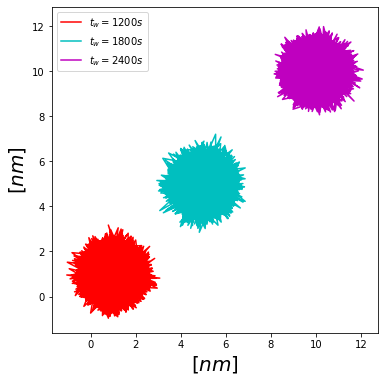

In [9]:
from pylab import rcParams
rcParams ['figure.figsize']=6,6

plt.plot(xarr_mv*1e9,xarr_mv2*1e9,'r-', label=r'$t_w = 1200 s$')
plt.plot(yarr_mv*1e9,yarr_mv2*1e9,'c-', label=r'$t_w = 1800 s$')
plt.plot(zarr_mv*1e9,zarr_mv2*1e9,'m-', label=r'$t_w = 2400 s$')

plt.legend(loc="upper left")
plt.ylabel(r'$ [nm] $', size=20)
plt.xlabel(r'$ [nm] $', size=20)

plt.axis('square')
plt.show()



In [10]:
'''np.savetxt('x_arr_vts12.txt', xarr_mv)
np.savetxt('y_arr_vts12.txt', yarr_mv)
np.savetxt('z_arr_vts12.txt', zarr_mv)
np.savetxt('dt_arr_vts12.txt',t_arr)'''

In [46]:
#-------------------------------body of the code
xm=0.0                                     #initial x cordinate in unit micro meter
ym=0.0                                     #initial y cordinate in unit micro meter
zm=0.0
xarr_m=[]                                #list of total x after ith step
yarr_m=[]                                #list of total y after ith step
zarr_m=[]



xv=0.0                                     #initial x cordinate in unit micro meter
yv=0.0                                     #initial y cordinate in unit micro meter
zv=0.0
xarr_v=[]                                #list of total x after ith step
yarr_v=[]                                #list of total y after 
zarr_v=[]


xv2=0.0                                     #initial x cordinate in unit micro meter
yv2=0.0                                     #initial y cordinate in unit micro meter
zv2=0.0
xarr_v2=[]                                #list of total x after ith step
yarr_v2=[]                                #list of total y after 
zarr_v2=[]



In [47]:
tf=10e-6                                  #total time in unit second

t=0.0
t_arr=[]                               #delta time array in seconds

t = 0
while t < tf:
    #--------------------maxwell part of the code
    #p=uniform(-8,-2)
    dt= tf/1e5 #(10**p)                            #linear distributed in 10 base logscale of time
    s=((2*D*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    xm=1e-9#xm+(gauss(m,s))
    xarr_m.append(xm)
    
    ym=1.85e-9#ym+(gauss(m,s))
    yarr_m.append(ym)
    
    zm=2.25e-9#ym+(gauss(m,s))
    zarr_m.append(zm)
    
    
    #---------------------voigt part of the code
    Ax=xv*exp(-(dt/(lamb*(exp(beta*time0)))))
    Bx=sqrt(((kb*T)/(k*(exp(alpha*time0))))*(1-exp(-(2*dt/(lamb*(exp(beta*time0)))))))
    
    Ay=yv*exp(-(dt/(lamb*(exp(beta*time1)))))
    By=sqrt(((kb*T)/(k*(exp(alpha*time1))))*(1-exp(-(2*dt/(lamb*(exp(beta*time1)))))))
    
    Az=zv*exp(-(dt/(lamb*(exp(beta*time2)))))
    Bz=sqrt(((kb*T)/(k*(exp(alpha*time2))))*(1-exp(-(2*dt/(lamb*(exp(beta*time2)))))))
    
    #---------------------voigt part of the code
    Ax2=xv2*exp(-(dt/(lamb*(exp(beta*time0)))))
    Bx2=sqrt(((kb*T)/(k*(exp(alpha*time0))))*(1-exp(-(2*dt/(lamb*(exp(beta*time0)))))))
    
    Ay2=yv2*exp(-(dt/(lamb*(exp(beta*time1)))))
    By2=sqrt(((kb*T)/(k*(exp(alpha*time1))))*(1-exp(-(2*dt/(lamb*(exp(beta*time1)))))))
    
    Az2=zv2*exp(-(dt/(lamb*(exp(beta*time2)))))
    Bz2=sqrt(((kb*T)/(k*(exp(alpha*time2))))*(1-exp(-(2*dt/(lamb*(exp(beta*time2)))))))
    
    
    xv=(gauss(Ax,Bx))
    xarr_v.append(xv)
    
    yv=(gauss(Ay,By))
    yarr_v.append(yv)
    
    zv=(gauss(Az,Bz))
    zarr_v.append(zv)
    
    xv2=(gauss(Ax2,Bx2))
    xarr_v2.append(xv2)
    
    yv2=(gauss(Ay2,By2))
    yarr_v2.append(yv2)
    
    zv2=(gauss(Az2,Bz2))
    zarr_v2.append(zv2)
    
    
    t=t+dt
    t_arr.append(t)
    
    
xarr_m=np.array(xarr_m)
yarr_m=np.array(yarr_m)
zarr_m=np.array(zarr_m)

#-----------------------------------
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)
zarr_v=np.array(zarr_v)


    
xarr_mv=(xarr_m +xarr_v)
yarr_mv=(yarr_m +yarr_v)
zarr_mv=(zarr_m +zarr_v)


#------------------------------------
xarr_v2=np.array(xarr_v2)
yarr_v2=np.array(yarr_v2)
zarr_v2=np.array(zarr_v2)


    
xarr_mv2=(xarr_m +xarr_v2)
yarr_mv2=(yarr_m +yarr_v2)
zarr_mv2=(zarr_m +zarr_v2)


max(t_arr)

len(xarr_mv)

100000

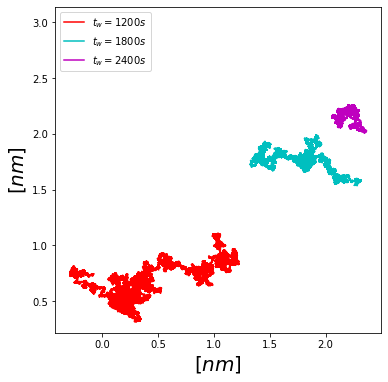

In [49]:
from pylab import rcParams
rcParams ['figure.figsize']=6,6

plt.plot(xarr_mv*1e9,xarr_mv2*1e9,'r-', label=r'$t_w = 1200 s$')
plt.plot(yarr_mv*1e9,yarr_mv2*1e9,'c-', label=r'$t_w = 1800 s$')
plt.plot(zarr_mv*1e9,zarr_mv2*1e9,'m-', label=r'$t_w = 2400 s$')

plt.legend(loc="upper left")
plt.ylabel(r'$ [nm] $', size=20)
plt.xlabel(r'$ [nm] $', size=20)

plt.axis('square')
plt.show()


